<a href="https://colab.research.google.com/github/RUMONMD89/Data-Science-with-Python/blob/main/ADS6REV_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 6. 決定木
# 6･2･1 決定木（CART）モデルの構築（Python）
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
adult_tr = pd.read_csv("adult_ch6_training.csv")
y = adult_tr[["Income"]]
mar_np = np.array(adult_tr['Marital status'])
print(mar_np)
#(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)
mar_cat = pd.get_dummies(mar_np)
print(mar_cat)
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis=1)
X_names = ["Cap_Gains_Losses", "Divorced", "Married", "Never-Married", "Separated", "Widowed"]
y_names = ["<=50K", ">50K"]
cart01 = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5).fit(X, y)
export_graphviz(cart01, out_file="aaa.dot", feature_names=X_names, class_names=y_names)
predIncomeCART = cart01.predict(X)

['Never-married' 'Divorced' 'Married' ... 'Married' 'Divorced' 'Married']
       Divorced  Married  Never-married  Separated  Widowed
0         False    False           True      False    False
1          True    False          False      False    False
2         False     True          False      False    False
3         False     True          False      False    False
4         False     True          False      False    False
...         ...      ...            ...        ...      ...
18756      True    False          False      False    False
18757     False     True          False      False    False
18758     False     True          False      False    False
18759      True    False          False      False    False
18760     False     True          False      False    False

[18761 rows x 5 columns]


In [3]:
# 6･3･1 決定木（C5.0）モデルの構築（Python)
c50_01 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5).fit(X, y)
export_graphviz(c50_01, out_file="c50_01.dot", feature_names=X_names, class_names=y_names)
c50_01.predict(X)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [4]:
# 6･4･1 ランダムフォレストモデルの構築（Python)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rfy = np.ravel(y)
rf01 = RandomForestClassifier(n_estimators=100, criterion="gini").fit(X, rfy)

from sklearn import tree
for i,val in enumerate(rf01.estimators_):
    tree.export_graphviz(rf01.estimators_[i], out_file='rf01_%d.dot'%i)

rf01.predict(X)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

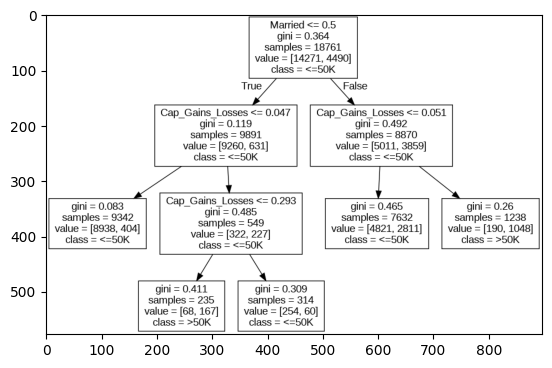

In [5]:
# [参考] Graphvizによる可視化
import subprocess
import cv2
import matplotlib.pyplot as plt

subprocess.run(["apt-get","install","graphviz","graphviz-dev"])

subprocess.run(["dot","-Tpng","-o","aaa.png","aaa.dot"])
fimg = cv2.imread("aaa.png")
plt.imshow(fimg)

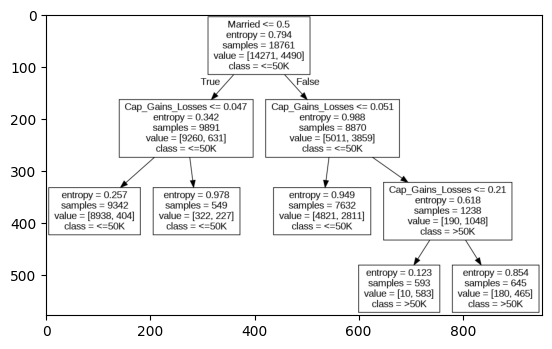

In [6]:
subprocess.run(["dot","-Tpng","-o","c50_01.png","c50_01.dot"])
fimg = cv2.imread("c50_01.png")
plt.imshow(fimg)

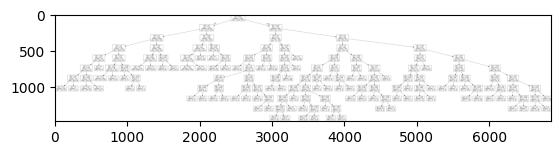

In [7]:
for i in range(0,100):
    fin  = 'rf01_'+str(i)+'.dot'
    fout = 'rf01_'+str(i)+'.png'
    subprocess.run(["dot", "-Tpng", "-o", fout, fin])
    if i == 99:
        fimg = cv2.imread(fout)
        plt.imshow(fimg)